In [1]:
from keras.datasets import imdb

(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
max([max(sequence) for sequence in train_data])

9999

In [14]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
translation = ' '.join([reverse_word_index.get(i-3,'?') for i in test_data[0]])
print(translation)

? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss


In [4]:
import numpy as np

def vectorize(sequences,dimensions=10000):
    ret = np.zeros((len(sequences),dimensions))
    for i,sequence in enumerate(sequences):
        ret[i,sequence] = 1.
    return ret

x_train = vectorize(train_data)
x_test = vectorize(test_data)
print(x_train)


[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [29]:
from keras import models
from keras import layers 

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,) ))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))



In [30]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [31]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 1s 75us/step - loss: 0.4846 - acc: 0.7753 - val_loss: 0.3192 - val_acc: 0.8822
Epoch 2/4
15000/15000 [==============================] - 1s 69us/step - loss: 0.2583 - acc: 0.9038 - val_loss: 0.2815 - val_acc: 0.8871
Epoch 3/4
15000/15000 [==============================] - 1s 69us/step - loss: 0.1875 - acc: 0.9305 - val_loss: 0.3014 - val_acc: 0.8819
Epoch 4/4
15000/15000 [==============================] - 1s 70us/step - loss: 0.1404 - acc: 0.9495 - val_loss: 0.2921 - val_acc: 0.8865


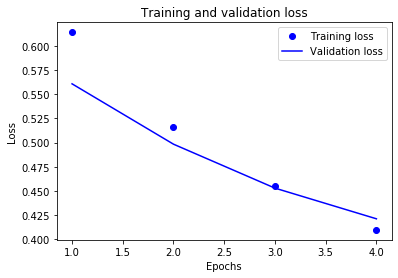

In [22]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(val_loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

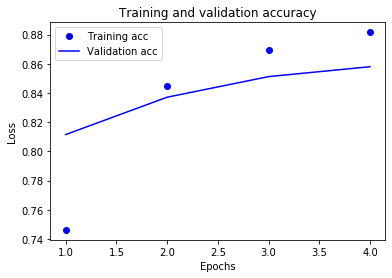

In [23]:
plt.clf() 
acc_values = history_dict['acc'] 
val_acc = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

In [32]:
model.evaluate(x_test,y_test)

25000/25000 [==============================] - 1s 23us/step


[0.31834423236846926, 0.876479983329773]

In [13]:
model.predict(x_test)[0]

array([0.21085146], dtype=float32)